In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vus.csv", comment="#")
df["time"] = pd.to_datetime(df["_time"], utc=True)
df["value"] = pd.to_numeric(df["_value"], errors="coerce").fillna(0.0)
df = df[["time", "value"]].sort_values("time")

In [3]:
t0 = df["time"].iloc[0]
df["elapsed_minute"] = (df["time"] - t0).dt.total_seconds() / 60.0

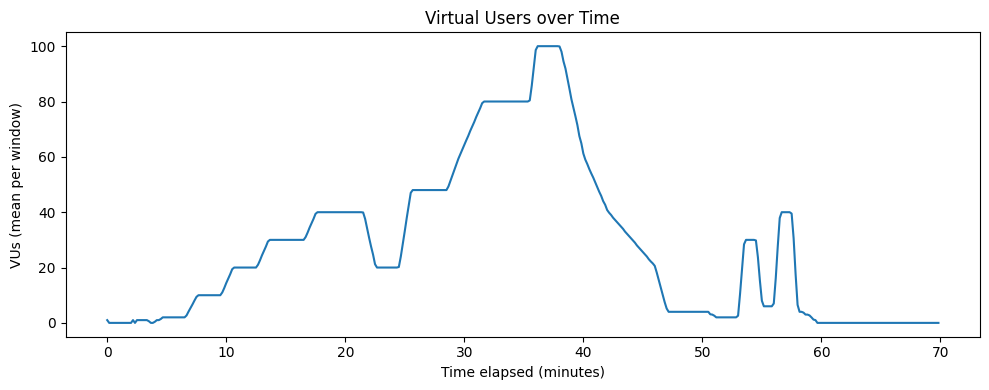

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(df["elapsed_minute"], df["value"])
plt.xlabel("Time elapsed (minutes)")
plt.ylabel("VUs (mean per window)")
plt.title("Virtual Users over Time")

plt.tight_layout()
plt.savefig("vus_timeseries.png", dpi=300)
plt.show()

In [ ]:
df = pd.read_csv("request.csv", comment="#")


In [ ]:
df["_value"] = pd.to_numeric(df["_value"], errors="coerce").fillna(0.0)

order = ["basic", "cpu", "memory"]
df["type"] = pd.Categorical(df["type"], categories=order, ordered=True)
df = df.sort_values("type")


In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(df["type"], df["_value"])
plt.xlabel("Request type")
plt.ylabel("Number of requests")
plt.title("Request Types Distribution")
plt.tight_layout()
plt.savefig("request.png", dpi=300)
plt.show()

In [ ]:
df = pd.read_csv("request_timeseries.csv", comment="#")
df["_time"] = pd.to_datetime(df["_time"], utc=True).dt.tz_convert("Asia/Jakarta")
df["_value"] = pd.to_numeric(df["_value"], errors="coerce").fillna(0.0)

df = df.sort_values("_time")
t0 = df["_time"].iloc[0]
df["menit"] = (df["_time"] - t0).dt.total_seconds() / 60.0

# pivot: tiap type jadi kolom
wide = df.pivot_table(
    index="menit", columns="type", values="_value", aggfunc="sum"
).fillna(0.0)

# pastikan kolom konsisten
for col in ["basic", "cpu", "memory"]:
    if col not in wide.columns:
        wide[col] = 0.0
wide = wide[["basic", "cpu", "memory"]]

# ubah ke persen
total = wide.sum(axis=1)
pct = wide.div(total.where(total > 0, 1), axis=0) * 100.0

plt.figure(figsize=(8, 4))
plt.stackplot(
    pct.index,
    pct["basic"],
    pct["cpu"],
    pct["memory"],
    labels=["basic", "cpu", "memory"],
)
plt.xlabel("Waktu relatif (menit)")
plt.ylabel("Proporsi jenis permintaan (%)")
plt.title("Proporsi Jenis Permintaan sepanjang Siklus Beban Kerja")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("request_timeseries.png", dpi=300)
plt.show()
